In [ ]:
zip_path = '/content/drive/My\ Drive/Dataset/Neural\ Data/cats-dogs.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/cats-dogs.zip -d /content

!rm /content/cats-dogs.zip

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

Conv2D filter 32, kernel 5x5, initializer = glorot uniform, learning rate = 0.01, optimizer = Adadelta

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adadelta
# https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='glorot_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
# model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = Adadelta(lr=0.01, rho=0.95, epsilon=1e-07)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               40960128  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 40,962,689
Trainable params: 40,962,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dataset_dir = '/content/'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(rescale=1.0/255.0)
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [ ]:
history_model_tunning2 = model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
100/100 [==============================] - 155s 2s/step - loss: 0.6887 - accuracy: 0.5444 - val_loss: 0.6628 - val_accuracy: 0.6257
Epoch 2/50
100/100 [==============================] - 155s 2s/step - loss: 0.6722 - accuracy: 0.5783 - val_loss: 0.6534 - val_accuracy: 0.6097
Epoch 3/50
100/100 [==============================] - 153s 2s/step - loss: 0.6608 - accuracy: 0.5947 - val_loss: 0.6412 - val_accuracy: 0.6208
Epoch 4/50
100/100 [==============================] - 153s 2s/step - loss: 0.6549 - accuracy: 0.6127 - val_loss: 0.6384 - val_accuracy: 0.6399
Epoch 5/50
100/100 [==============================] - 155s 2s/step - loss: 0.6477 - accuracy: 0.6200 - val_loss: 0.6299 - val_accuracy: 0.6328
Epoch 6/50
100/100 [==============================] - 154s 2s/step - loss: 0.6419 - accuracy: 0.6247 - val_loss: 0.6173 - val_accuracy: 0.6572
Epoch 7/50
100/100 [==============================] - 154s 2s/step

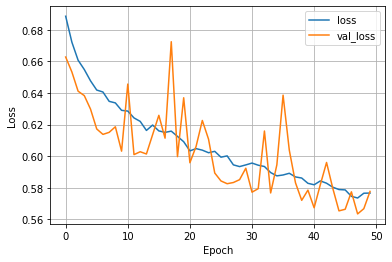

In [ ]:
plot_loss(history_model_tunning2)

Ini adalah tunning dengan akurasi rendah yang saya dapatkan yaitu sekitar 68%. saya menggunakan baseline dengan optimizer Adadelta dengan ukuran layer 5x5.